# GITHUB

https://github.com/Vladimirjon/MetodosNumericos_PasquelJohann/blob/main/Extra_MN/Participación_en_clase/%5BParticipación%20en%20clase%2011%5D_PasquelJohann.ipynb

# Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

# Conjunto de datos de ejemplo

In [3]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [4]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-11 11:17:57][INFO] 2025-01-11 11:17:57.660510


[01-11 11:17:57][INFO] 2025-01-11 11:17:57.760407
[01-11 11:17:57][INFO] Se ajustarán 2 parámetros.
[01-11 11:17:57][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-11 11:18:00][INFO] Se ajustarán 2 parámetros.
[01-11 11:18:00][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


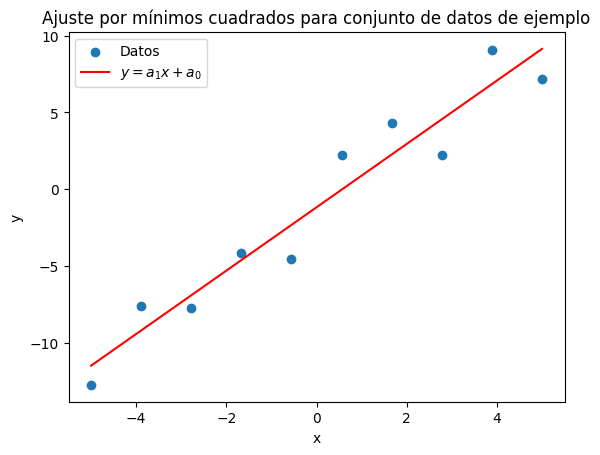

In [5]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [6]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

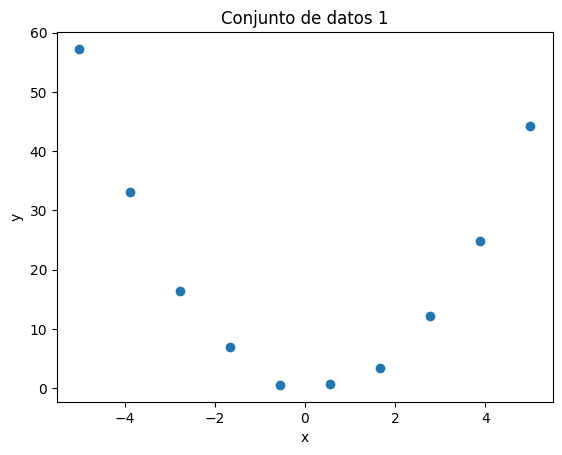

In [7]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática. 

[01-11 12:51:45][INFO] Se ajustarán 3 parámetros.
[01-11 12:51:45][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-11 12:51:45][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
a_2: 2.024410482925083, a_1: -1.123325129575543, a_0: -0.6382556172537739


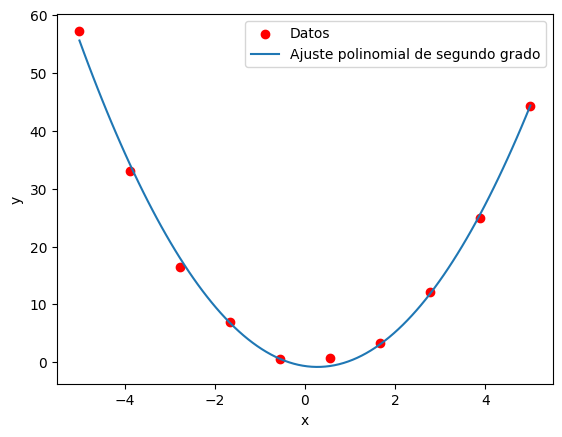

In [28]:
# Importar las funciones necesarias
from src import ajustar_min_cuadrados
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos 1
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

# Derivadas parciales para un polinomio de segundo grado: a*x^2 + b*x + c
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(y * x**2 for x, y in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(x for x in xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**2 for x in xs)
    c_1 = sum(x for x in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

# Ajustar el polinomio de segundo grado
gradientes = [der_parcial_2, der_parcial_1, der_parcial_0]
params = ajustar_min_cuadrados(xs1, ys1, gradientes)

# Imprimir los coeficientes
a_2, a_1, a_0 = params
print(f"a_2: {a_2}, a_1: {a_1}, a_0: {a_0}")

# Graficar los puntos y el polinomio ajustado
plt.scatter(xs1, ys1, color='red', label='Datos')
x_fit = np.linspace(min(xs1), max(xs1), 100)
y_fit = a_2 * x_fit**2 + a_1 * x_fit + a_0
plt.plot(x_fit, y_fit, label='Ajuste polinomial de segundo grado')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Conjunto de datos 2

In [31]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

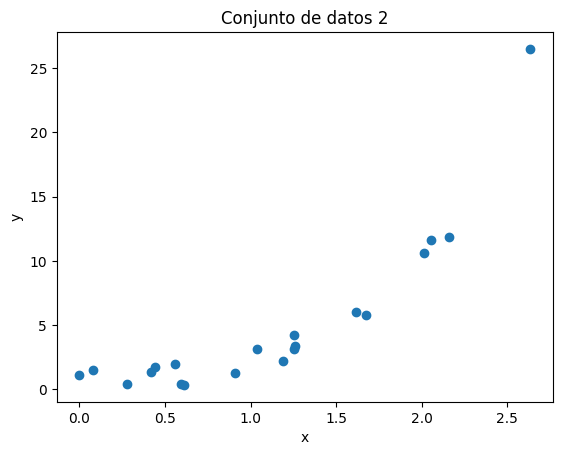

In [23]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial. 

[01-11 12:55:10][INFO] Se ajustarán 2 parámetros.
[01-11 12:55:10][INFO] 
[[22.0372     20.         19.05727035]
 [ 0.         -9.57184451  5.82589171]]
a: 0.5440855388147081, b: 1.4171603667055415


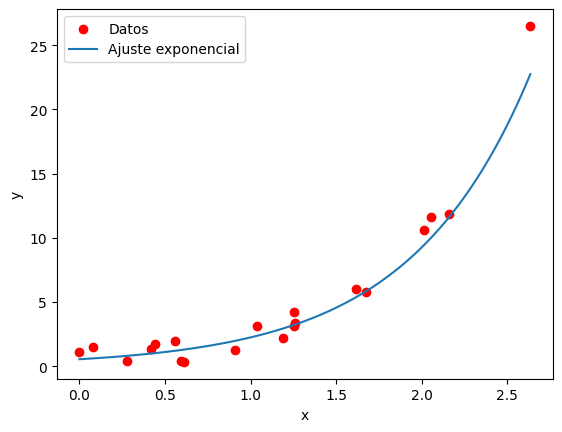

In [32]:

# Transformar ys2 aplicando el logaritmo natural
ln_ys2 = np.log(ys2)

# Derivadas parciales para la función lineal ln(y) = ln(a) + bx
def der_parcial_b(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))
    return (c_1, c_0, c_ind)

def der_parcial_ln_a(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_1, c_0, c_ind)

# Ajustar la función lineal
gradientes = [der_parcial_b, der_parcial_ln_a]
params = ajustar_min_cuadrados(xs2, ln_ys2, gradientes)

# Convertir ln(a) de vuelta a a
b, ln_a = params
a = np.exp(ln_a)

# Imprimir los coeficientes
print(f"a: {a}, b: {b}")

# Graficar los puntos y la curva exponencial ajustada
plt.scatter(xs2, ys2, color='red', label='Datos')
x_fit = np.linspace(min(xs2), max(xs2), 100)
y_fit = a * np.exp(b * x_fit)
plt.plot(x_fit, y_fit, label='Ajuste exponencial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()